In [2]:
import osmnx as ox
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import math
def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [3]:
grouped_dataframes = pd.read_pickle('grouped_dataframes.pkl')

In [4]:
names = list(grouped_dataframes.keys())
grouped_dataframes[names[5]]

,Vej-Id,Kilometer,Retning,Spor,Dato,Aarstal,Maened,Dag,Dagtype,Trafiktype,Xkoordinat,Ykoordinat,time_interval,traffic_flow,time_start
datetime,,,,,,,,,,,,,,,
1675206000,0 450-0 7/ 300 -2,7.0,-,2.0,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,552601.0,6329842.0,00:00-00:15,6.0,00:00
1675206900,0 450-0 7/ 300 -2,7.0,-,2.0,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,552601.0,6329842.0,00:15-00:30,9.0,00:15
1675207800,0 450-0 7/ 300 -2,7.0,-,2.0,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,552601.0,6329842.0,00:30-00:45,2.0,00:30
1675208700,0 450-0 7/ 300 -2,7.0,-,2.0,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,552601.0,6329842.0,00:45-01:00,0.0,00:45
1675209600,0 450-0 7/ 300 -2,7.0,-,2.0,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,552601.0,6329842.0,01:00-01:15,1.0,01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704059100,0 450-0 7/ 300 -2,7.0,-,2.0,31.12.2023,2023.0,12.0,31.0,Helligdag,BY,552601.0,6329842.0,22:45-23:00,25.0,22:45
1704060000,0 450-0 7/ 300 -2,7.0,-,2.0,31.12.2023,2023.0,12.0,31.0,Helligdag,BY,552601.0,6329842.0,23:00-23:15,NaN,23:00
1704060900,0 450-0 7/ 300 -2,7.0,-,2.0,31.12.2023,2023.0,12.0,31.0,Helligdag,BY,552601.0,6329842.0,23:15-23:30,NaN,23:15


In [5]:
unique_dataframes = dict()
cords = list()
names = (grouped_dataframes.keys()) 
start_date = list()
k = 0
for name in names:
    x,y = grouped_dataframes[name]['Xkoordinat'].iloc[0], grouped_dataframes[name]['Xkoordinat'].iloc[0]
    if (x,y) not in cords:
        unique_dataframes[name] = grouped_dataframes[name]
        print("Unique Dataframes", k)
        k += 1
        cords.append((x,y))
        start_date.append((grouped_dataframes[name].index[0],grouped_dataframes[name].index[1],len(grouped_dataframes[name])))

grouped_dataframes = unique_dataframes
        

Unique Dataframes 0
Unique Dataframes 1
Unique Dataframes 2
Unique Dataframes 3
Unique Dataframes 4
Unique Dataframes 5
Unique Dataframes 6
Unique Dataframes 7
Unique Dataframes 8
Unique Dataframes 9
Unique Dataframes 10
Unique Dataframes 11
Unique Dataframes 12
Unique Dataframes 13
Unique Dataframes 14
Unique Dataframes 15
Unique Dataframes 16
Unique Dataframes 17
Unique Dataframes 18
Unique Dataframes 19
Unique Dataframes 20
Unique Dataframes 21
Unique Dataframes 22
Unique Dataframes 23
Unique Dataframes 24
Unique Dataframes 25
Unique Dataframes 26
Unique Dataframes 27
Unique Dataframes 28
Unique Dataframes 29
Unique Dataframes 30
Unique Dataframes 31
Unique Dataframes 32
Unique Dataframes 33
Unique Dataframes 34
Unique Dataframes 35
Unique Dataframes 36
Unique Dataframes 37
Unique Dataframes 38
Unique Dataframes 39
Unique Dataframes 40
Unique Dataframes 41
Unique Dataframes 42
Unique Dataframes 43
Unique Dataframes 44
Unique Dataframes 45
Unique Dataframes 46
Unique Dataframes 47
Un

In [6]:
import math

def find_closest_unconnected_nodes(grouped_dataframes):
    closest = dict()
    cleaned_dataframes = {}
    names = list(grouped_dataframes.keys())
    for i, name in enumerate(names):
        print(f"{i}/{len(names)}")
        df = grouped_dataframes[name]
        cleaned_dataframes[i] = df[['traffic_flow', 'Xkoordinat', 'Ykoordinat']].copy()
        x1 = df['Xkoordinat'].iloc[0]# + np.random-randint(-3000,3000)
        y1 = df['Ykoordinat'].iloc[0]# + np.random-randint(-3000,3000)
        
        for j, other_name in enumerate(names):
            if j != i:
                df2 = grouped_dataframes[other_name]
                x2, y2 = df2['Xkoordinat'].iloc[0], df2['Ykoordinat'].iloc[0]
                closest[j] = euclidean_distance(x1, y1, x2, y2)
        
        for k in range(0,10,1):
            cleaned_dataframes[i][f'closest_edge_{k}'] = None
            smallest_edge = min(closest, key=closest.get)
            cleaned_dataframes[i][f'closest_edge_{k}'] = smallest_edge
            closest.pop(smallest_edge)

    
    return cleaned_dataframes

cleaned_dataframes = find_closest_unconnected_nodes(grouped_dataframes)

0/180
1/180
2/180
3/180
4/180
5/180
6/180
7/180
8/180
9/180
10/180
11/180
12/180
13/180
14/180
15/180
16/180
17/180
18/180
19/180
20/180
21/180
22/180
23/180
24/180
25/180
26/180
27/180
28/180
29/180
30/180
31/180
32/180
33/180
34/180
35/180
36/180
37/180
38/180
39/180
40/180
41/180
42/180
43/180
44/180
45/180
46/180
47/180
48/180
49/180
50/180
51/180
52/180
53/180
54/180
55/180
56/180
57/180
58/180
59/180
60/180
61/180
62/180
63/180
64/180
65/180
66/180
67/180
68/180
69/180
70/180
71/180
72/180
73/180
74/180
75/180
76/180
77/180
78/180
79/180
80/180
81/180
82/180
83/180
84/180
85/180
86/180
87/180
88/180
89/180
90/180
91/180
92/180
93/180
94/180
95/180
96/180
97/180
98/180
99/180
100/180
101/180
102/180
103/180
104/180
105/180
106/180
107/180
108/180
109/180
110/180
111/180
112/180
113/180
114/180
115/180
116/180
117/180
118/180
119/180
120/180
121/180
122/180
123/180
124/180
125/180
126/180
127/180
128/180
129/180
130/180
131/180
132/180
133/180
134/180
135/180
136/180
137/180
138/18

In [7]:
# from datetime import datetime
# import time
# def find_longest_common_period(dataframes_dict):
#     """
#     This function finds the longest common date range across a dictionary of dataframes, 
#     where each dataframe's index is a datetime object representing the time series.
    
#     Parameters:
#     dataframes_dict (dict): A dictionary of DataFrames where each DataFrame has a datetime index.

#     Returns:
#     tuple: Start and end date of the longest common period.
#     """
#     # Initialize the start and end dates to the extreme opposites
#     max_start_date = timestamp = time.mktime(time.strptime('1970-10-20 22:24:46', '%Y-%m-%d %H:%M:%S'))
#     min_end_date = timestamp = time.mktime(time.strptime('2025-10-20 22:24:46', '%Y-%m-%d %H:%M:%S'))

#     # Loop through each DataFrame to find the latest start date and earliest end date
#     for df in dataframes_dict.values():
#         # Get the start and end dates of each DataFrame
#         df_start_date = df.index.min()
#         df_end_date = df.index.max()

#         # Update the max of start dates and min of end dates
#         max_start_date = max(max_start_date, df_start_date)
#         min_end_date = min(min_end_date, df_end_date)
#         print(max_start_date, min_end_date)
#     # Check if there's a valid common period
#     if max_start_date <= min_end_date:
#         return max_start_date, min_end_date
#     else:
#         return None  # No overlapping period found

# find_longest_common_period(cleaned_dataframes)

In [8]:
def create_15min_interval_index(start_date, end_date):
    # Convert start_date and end_date to milliseconds
    current_time = int(start_date.timestamp())
    end_time = int(end_date.timestamp())
    
    # Interval in milliseconds (15 minutes = 900000 ms)
    interval = 900

    # List to hold each timestamp in milliseconds
    time_index_ms = []

    # Loop to generate timestamps at 15-minute intervals
    while current_time <= end_time:
        time_index_ms.append(current_time)
        current_time += interval

    return pd.Index(time_index_ms)


In [9]:
# Determine the earliest start date and latest end date across all DataFrames
start_date = min(df.index.min() for df in grouped_dataframes.values() if df.index.notna().all())
end_date = max(df.index.max() for df in grouped_dataframes.values() if df.index.notna().all())

start_date = pd.Timestamp("2022-01-01 00:00:00")
end_date = pd.Timestamp("2024-01-01 00:00:00")

time_index_ms = create_15min_interval_index(start_date, end_date)

everything_df = pd.DataFrame(index=time_index_ms, columns=range(0,179,1))

In [10]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [12]:
for i, name in enumerate(cleaned_dataframes):
    print(i, len(cleaned_dataframes))
    df = cleaned_dataframes[name]['traffic_flow']
    column_values = everything_df[name]  # Create a local copy of the column

    for j, traffic_flow in enumerate(df):
        idx = df.index[j]
        column_values[idx] = traffic_flow  # Modify the local copy

        if j % 100 == 0:
            print(j, len(df))
    
    everything_df[name] = column_values  # Update the column in everything_df


0 180
0 34656
100 34656
200 34656
300 34656
400 34656
500 34656
600 34656
700 34656
800 34656
900 34656
1000 34656
1100 34656
1200 34656
1300 34656
1400 34656
1500 34656
1600 34656
1700 34656
1800 34656
1900 34656
2000 34656
2100 34656
2200 34656
2300 34656
2400 34656
2500 34656
2600 34656
2700 34656
2800 34656
2900 34656
3000 34656
3100 34656
3200 34656
3300 34656
3400 34656
3500 34656
3600 34656
3700 34656
3800 34656
3900 34656
4000 34656
4100 34656
4200 34656
4300 34656
4400 34656
4500 34656
4600 34656
4700 34656
4800 34656
4900 34656
5000 34656
5100 34656
5200 34656
5300 34656
5400 34656
5500 34656
5600 34656
5700 34656
5800 34656
5900 34656
6000 34656
6100 34656
6200 34656
6300 34656
6400 34656
6500 34656
6600 34656
6700 34656
6800 34656
6900 34656
7000 34656
7100 34656
7200 34656
7300 34656
7400 34656
7500 34656
7600 34656
7700 34656
7800 34656
7900 34656
8000 34656
8100 34656
8200 34656
8300 34656
8400 34656
8500 34656
8600 34656
8700 34656
8800 34656
8900 34656
9000 34656
9100 

KeyboardInterrupt: 

In [13]:
# Collect data without inserting directly into everything_df
for i, name in enumerate(cleaned_dataframes):
    print(i, len(cleaned_dataframes))
    df = cleaned_dataframes[name]['traffic_flow']

    for j, traffic_flow in enumerate(df):
        idx = df.index[j]
        #print("DF: ",name,idx)
        everything_df.loc[idx, name] = traffic_flow

        if j%100==0:
            print(j, len(df))

0 180
0 34656
100 34656
200 34656
300 34656
400 34656
500 34656
600 34656
700 34656
800 34656
900 34656
1000 34656
1100 34656
1200 34656
1300 34656
1400 34656
1500 34656
1600 34656
1700 34656
1800 34656
1900 34656
2000 34656
2100 34656
2200 34656
2300 34656
2400 34656
2500 34656
2600 34656
2700 34656
2800 34656
2900 34656
3000 34656
3100 34656
3200 34656
3300 34656
3400 34656
3500 34656
3600 34656
3700 34656
3800 34656
3900 34656
4000 34656
4100 34656
4200 34656
4300 34656
4400 34656
4500 34656
4600 34656
4700 34656
4800 34656
4900 34656
5000 34656
5100 34656
5200 34656
5300 34656
5400 34656
5500 34656
5600 34656
5700 34656
5800 34656
5900 34656
6000 34656
6100 34656
6200 34656
6300 34656
6400 34656
6500 34656
6600 34656
6700 34656
6800 34656
6900 34656
7000 34656
7100 34656
7200 34656
7300 34656
7400 34656
7500 34656
7600 34656
7700 34656
7800 34656
7900 34656
8000 34656
8100 34656
8200 34656
8300 34656
8400 34656
8500 34656
8600 34656
8700 34656
8800 34656
8900 34656
9000 34656
9100 

KeyboardInterrupt: 

In [22]:
import numpy as np

for i, name in enumerate(cleaned_dataframes):
    print(i, len(cleaned_dataframes))
    df = cleaned_dataframes[name]['traffic_flow']
    df_indexes = np.array(df.index)
    df_values = np.array(df.values)

    for j in range(len(df)):
        idx = df_indexes[j]
        everything_df.loc[idx, name] = df_values[j]

        if j % 100 == 0:
            print(j, len(df))


0 180
0 34656
100 34656
200 34656
300 34656
400 34656
500 34656
600 34656
700 34656
800 34656
900 34656
1000 34656
1100 34656
1200 34656
1300 34656
1400 34656
1500 34656
1600 34656
1700 34656
1800 34656
1900 34656
2000 34656
2100 34656
2200 34656
2300 34656
2400 34656
2500 34656
2600 34656
2700 34656
2800 34656
2900 34656
3000 34656
3100 34656
3200 34656
3300 34656
3400 34656
3500 34656
3600 34656
3700 34656
3800 34656
3900 34656
4000 34656
4100 34656
4200 34656
4300 34656
4400 34656
4500 34656
4600 34656
4700 34656
4800 34656
4900 34656
5000 34656
5100 34656
5200 34656
5300 34656
5400 34656
5500 34656
5600 34656
5700 34656
5800 34656
5900 34656
6000 34656
6100 34656
6200 34656
6300 34656
6400 34656
6500 34656
6600 34656
6700 34656
6800 34656
6900 34656
7000 34656
7100 34656
7200 34656
7300 34656
7400 34656
7500 34656
7600 34656
7700 34656
7800 34656
7900 34656
8000 34656
8100 34656
8200 34656
8300 34656
8400 34656
8500 34656
8600 34656
8700 34656
8800 34656
8900 34656
9000 34656
9100 

KeyboardInterrupt: 

In [ ]:
better = everything_df.dropna(axis=0, how='all', inplace=False)
better = better.bfill(inplace=False)
#better.ffill(inplace=False)


C:\Users\gonde\AppData\Local\Temp\ipykernel_13884\1755806829.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  better = better.bfill(inplace=False)


In [ ]:

def find_longest_non_nan_period(df, threshold=None, tolerance=0):
    """
    Finds the longest continuous period in a DataFrame where there are no NaN values in most columns,
    with tolerance for short gaps.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    threshold (float): The minimum proportion of non-NaN values in each row (e.g., 0.8 for 80% of columns).
                       If None, defaults to 50% (more than half of columns).
    tolerance (int): The maximum number of consecutive rows with NaN values that are tolerated as part of the period.

    Returns:
    pd.DataFrame: Cropped DataFrame to the longest continuous period with minimal NaN values.
    """
    # Set default threshold to more than half of the columns if not specified
    if threshold is None:
        threshold = 0.5

    # Calculate the required number of non-NaN values per row
    required_non_nan = int(len(df.columns) * threshold)

    # Create a boolean mask where each row has True if it meets the non-NaN requirement
    valid_rows = df.notna().sum(axis=1) >= required_non_nan

    # Variables to track the longest valid period
    max_start = max_end = temp_start = temp_length = max_length = 0
    gap_count = 0  # Count of consecutive invalid rows within tolerance

    for i, valid in enumerate(valid_rows):
        if valid:
            if temp_length == 0:
                temp_start = i  # Start a new period
            temp_length += 1
            gap_count = 0  # Reset gap count as we are in a valid row
        else:
            if gap_count < tolerance:
                gap_count += 1  # Increase gap count but keep period going
                temp_length += 1
            else:
                # End of current period due to excessive gap
                if temp_length > max_length:
                    max_start, max_end = temp_start, temp_start + temp_length
                    max_length = temp_length
                # Reset for a new period
                temp_length = 0
                gap_count = 0

    # Final check in case the longest period ends at the last row
    if temp_length > max_length:
        max_start, max_end = temp_start, temp_start + temp_length

    # Crop the DataFrame to the longest continuous non-NaN period
    return df.iloc[max_start:max_end]


better = find_longest_non_nan_period(better, threshold=0.8, tolerance=3)

In [ ]:
better.dropna(axis=0, how='all', inplace=True)
better = better.bfill(inplace=False)
better.fillna(0, inplace=True)

In [ ]:
def find_longest_repeating_values(df):
    """
    Checks each column in the DataFrame for the longest repeating value sequence.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    None
    """
    for column in df.columns:
        longest_value = None
        longest_count = 0
        current_value = None
        current_count = 0

        # Loop through the values in the column
        for value in df[column]:
            if value == current_value:
                current_count += 1
            else:
                if current_count > longest_count:
                    longest_value = current_value
                    longest_count = current_count
                current_value = value
                current_count = 1

        # Final check in case the longest sequence ends at the last row
        if current_count > longest_count:
            longest_value = current_value
            longest_count = current_count

        # Print the results for this column
        print(f"Column: {column}, Longest Repeating Value: {longest_value}, Count: {longest_count}")


def find_columns_with_repeating_values(df, threshold):
    """
    Checks each column in the DataFrame for repeating value sequences longer than the specified threshold.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    threshold (int): The minimum length of the repeating value sequence to consider.

    Returns:
    list: A list of column names that have repeating value sequences longer than the threshold.
    """
    columns_with_repeating_values = []

    for column in df.columns:
        longest_count = 0
        current_value = None
        current_count = 0

        # Loop through the values in the column
        for value in df[column]:
            if value == current_value:
                current_count += 1
            else:
                if current_count > longest_count:
                    longest_count = current_count
                current_value = value
                current_count = 1

        # Final check in case the longest sequence ends at the last row
        if current_count > longest_count:
            longest_count = current_count

        # Check if the longest repeating sequence is longer than the threshold
        if longest_count > threshold:
            columns_with_repeating_values.append(column)

    return columns_with_repeating_values

def filter_dict_and_dataframe_by_keys(data_dict, df):
    """
    Filters a dictionary and a DataFrame to only keep dictionary entries 
    where the keys match the column names of the DataFrame, and vice versa.

    Parameters:
    data_dict (dict): The dictionary to filter.
    df (pd.DataFrame): The DataFrame to filter.

    Returns:
    tuple: (filtered_dict, filtered_df)
    """
    # Find common keys between the dictionary and DataFrame columns
    common_keys = set(data_dict.keys()).intersection(set(df.columns))
    
    # Filter the dictionary to only keep entries with matching keys
    filtered_dict = {key: value for key, value in data_dict.items() if key in common_keys}
    
    # Filter the DataFrame to only keep columns with matching keys
    filtered_df = df.loc[:, common_keys]

    return filtered_dict, filtered_df

threshold = 500
remove_coloumns = find_columns_with_repeating_values(better, threshold)
better.drop(columns=remove_coloumns, inplace=True)
print(remove_coloumns)

def filter_dict_and_dataframe_by_keys(data_dict, df):
    """
    Filters a dictionary and a DataFrame to only keep dictionary entries 
    where the keys match the column names of the DataFrame, and vice versa.

    Parameters:
    data_dict (dict): The dictionary to filter.
    df (pd.DataFrame): The DataFrame to filter.

    Returns:
    tuple: (filtered_dict, filtered_df)
    """
    # Find common keys between the dictionary and DataFrame columns
    common_keys = set(data_dict.keys()).intersection(set(df.columns))
    
    # Filter the dictionary to only keep entries with matching keys
    filtered_dict = {key: value for key, value in data_dict.items() if key in common_keys}
    
    # Filter the DataFrame to only keep columns with matching keys (convert set to list)
    filtered_df = df.loc[:, list(common_keys)]

    return filtered_dict, filtered_df


cleaned_dataframes, better = filter_dict_and_dataframe_by_keys(cleaned_dataframes, better)

[]
Index([  1,   5,   6,   7,  10,  11,  12,  13,  14,  15,  17,  18,  19,  20,
        21,  22,  24,  25,  30,  31,  33,  35,  36,  37,  38,  39,  40,  41,
        42,  44,  51,  53,  54,  56,  57,  58,  60,  61,  62,  63,  64,  66,
        67,  68,  69,  71,  75,  93,  94,  95, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 113, 114, 115, 119, 121, 123, 124, 126, 128, 130, 132,
       134, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 172, 174, 175, 178, 179],
      dtype='int64')


Graph

In [ ]:
list(cleaned_dataframes.keys()) == list(better.columns)

True

In [ ]:
# Initialize the graph
graph = nx.Graph()

names = list(cleaned_dataframes.keys())

# Add nodes and edges to the graph
for i in names:
    idx = cleaned_dataframes[i].first_valid_index()
    
    # Add node with attributes
    graph.add_node(
        i,
        x=cleaned_dataframes[i]['Xkoordinat'][idx],
        y=cleaned_dataframes[i]['Ykoordinat'][idx],
        traffic=better[i].values
    )

    for j in range(0,10,1):
        # Get the ID of the closest edge and add an edge between nodes
        closest_node = cleaned_dataframes[i][f'closest_edge_{j}'].iloc[0]
        print(i,closest_node)
        graph.add_edge(i, closest_node)  # Add edge by node indices (i, closest_node)
        #graph.add_edge(i, np.random.randint(484))  # Add edge by node indices (i, closest_node)


1 0
1 144
1 159
1 151
1 145
1 154
1 157
1 146
1 179
1 143
5 51
5 6
5 66
5 7
5 71
5 60
5 47
5 46
5 8
5 52
6 66
6 7
6 71
6 51
6 60
6 5
6 8
6 52
6 9
6 72
7 71
7 66
7 6
7 51
7 60
7 8
7 5
7 52
7 9
7 72
10 9
10 72
10 52
10 169
10 8
10 60
10 175
10 11
10 7
10 71
11 12
11 10
11 169
11 175
11 9
11 72
11 52
11 8
11 13
11 53
12 11
12 13
12 53
12 54
12 58
12 73
12 61
12 14
12 175
12 10
13 53
13 54
13 58
13 73
13 61
13 14
13 12
13 15
13 16
13 17
14 61
14 73
14 58
14 54
14 53
14 13
14 15
14 16
14 17
14 12
15 16
15 17
15 14
15 61
15 18
15 73
15 19
15 67
15 62
15 58
17 16
17 15
17 18
17 19
17 67
17 62
17 14
17 61
17 73
17 58
18 19
18 67
18 62
18 17
18 20
18 16
18 15
18 21
18 22
18 14
19 62
19 18
19 67
19 20
19 17
19 16
19 15
19 21
19 22
19 55
20 21
20 22
20 62
20 19
20 67
20 18
20 55
20 74
20 23
20 17
21 22
21 20
21 55
21 74
21 23
21 68
21 63
21 24
21 62
21 43
22 21
22 55
22 74
22 20
22 23
22 68
22 63
22 24
22 43
22 62
24 68
24 63
24 43
24 23
24 74
24 55
24 48
24 25
24 81
24 84
25 48
25 44
25 81
25 85

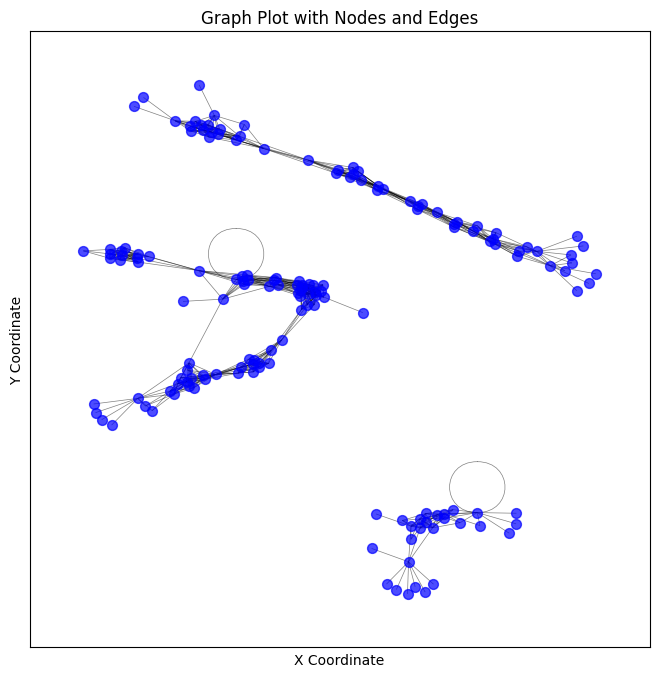

In [ ]:

# Define the positions of the nodes using their 'x' and 'y' attributes
pos = nx.spring_layout(graph, seed=1337)  # Use a fixed seed for reproducibility


# Plot the graph
plt.figure(figsize=(8, 8))

# Draw nodes with custom size
nx.draw_networkx_nodes(graph, pos, node_size=50, node_color="blue", alpha=0.7)

# Draw edges with custom width
nx.draw_networkx_edges(graph, pos, width=0.5, edge_color="black", alpha=0.5)

# Optionally, draw labels for each node if you want to see the node IDs or specific data
# Uncomment the following line if you'd like to see labels (e.g., traffic values or node IDs)
# nx.draw_networkx_labels(graph, pos, labels={node: node for node in graph.nodes()}, font_size=8)

# Set plot labels and title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Graph Plot with Nodes and Edges")

# Show the plot
plt.show()

In [ ]:
import pickle

pickle.dump(graph, open('graph.pkl', 'wb'))

In [ ]:
def clean_graph(graph):
    # Remove self-loops
    self_loops = list(nx.selfloop_edges(graph))
    graph.remove_edges_from(self_loops)
    
    # Remove duplicate edges (not necessary for undirected graphs in NetworkX)
    # Here just in case your graph is directed or you need further verification
    edges_to_remove = []
    for u, v, data in graph.edges(data=True):
        if graph.number_of_edges(u, v) > 1:  # More than one edge exists
            edges_to_remove.append((u, v))
    
    graph.remove_edges_from(edges_to_remove)
    
    print(f"Removed {len(self_loops)} self-loops and {len(edges_to_remove)} duplicate edges.")
    return graph

graph = clean_graph(graph)

Removed 0 self-loops and 0 duplicate edges.


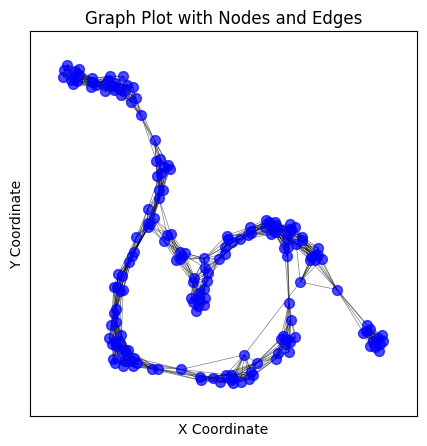

In [ ]:
# extract largest component
largest_component = max(nx.connected_components(graph), key=len)
subgraph = graph.subgraph(largest_component)
# Plot the graph
plt.figure(figsize=(5, 5))

# Draw nodes with custom size
nx.draw_networkx_nodes(subgraph, pos, node_size=50, node_color="blue", alpha=0.7)

# Draw edges with custom width
nx.draw_networkx_edges(subgraph, pos, width=0.5, edge_color="black", alpha=0.5)

# Optionally, draw labels for each node if you want to see the node IDs or specific data
# Uncomment the following line if you'd like to see labels (e.g., traffic values or node IDs)
# nx.draw_networkx_labels(graph, pos, labels={node: node for node in graph.nodes()}, font_size=8)

# Set plot labels and title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Graph Plot with Nodes and Edges")

# Show the plot
plt.show()

Model things

In [ ]:
graph.nodes(data=True)

NodeDataView({0: {'x': 552601.0, 'y': 6329842.0, 'traffic': array([89., 89., 89., ...,  0.,  0.,  0.])}, 1: {'x': 549360.0, 'y': 6330576.0, 'traffic': array([ 4., 12., 17., ..., 30., 25., 26.])}, 144: {'x': 556874.0, 'y': 6332374.0, 'traffic': array([12., 13., 39., ..., 88., 67., 91.])}, 159: {'x': 556968.0, 'y': 6333118.0, 'traffic': array([ 1.,  3., 14., ..., 12.,  6., 13.])}, 151: {'x': 557050.0, 'y': 6333097.0, 'traffic': array([ 4.,  1.,  8., ..., 12., 10., 16.])}, 145: {'x': 557042.0, 'y': 6333224.0, 'traffic': array([ 8., 12., 31., ..., 76., 57., 75.])}, 154: {'x': 557034.0, 'y': 6333381.0, 'traffic': array([0., 0., 1., ..., 3., 7., 9.])}, 157: {'x': 557128.0, 'y': 6333355.0, 'traffic': array([0., 0., 1., ..., 6., 6., 7.])}, 143: {'x': 558595.0, 'y': 6328535.0, 'traffic': array([14., 12., 42., ..., 79., 69., 86.])}, 152: {'x': 558628.0, 'y': 6328098.0, 'traffic': array([1., 1., 3., ..., 5., 3., 4.])}, 139: {'x': 558649.0, 'y': 6328099.0, 'traffic': array([12., 12., 37., ..., 73.

In [ ]:
from torch_geometric.data import Data
import torch
import numpy as np

# Assuming `graph` is your NetworkX graph
x_coords = [data['x'] for _, data in graph.nodes(data=True)]
y_coords = [data['y'] for _, data in graph.nodes(data=True)]
traffic_series = [data['traffic'] for _, data in graph.nodes(data=True)]

# Convert the traffic data list to a 2D numpy array
traffic_series = np.stack(traffic_series)

# Stack x, y, and traffic data into a single feature array
node_features = np.column_stack((x_coords, y_coords, traffic_series))

# Convert to PyTorch tensor
node_features = torch.tensor(node_features, dtype=torch.float)

# Add edges
edge_index = torch.tensor(list(graph.edges)).T  # List of edges converted to tensor

# Create PyTorch Geometric Data object
data = Data(x=node_features, edge_index=edge_index)


In [ ]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class TrafficGNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)


    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x


In [ ]:
model = TrafficGNN(in_channels=node_features.size(1), hidden_channels=32, out_channels=1)

In [ ]:
len(traffic_series[0])

56629

In [ ]:
from torch.optim import Adam

optimizer = Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

# Here, traffic_series has shape [num_nodes, T], so we take the last value as the target
target_values = traffic_series[:, -1]  # For example, predicting the last timestep in each series

# Convert target values to a PyTorch tensor
target = torch.tensor(target_values, dtype=torch.float).view(-1, 1)  # Shape [num_nodes, 1]

model.train()
for epoch in range(30000):
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out, target)  # Using the defined `target` tensor
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 864869056.0
Epoch 1, Loss: 60979548160.0
Epoch 2, Loss: 10367258624.0
Epoch 3, Loss: 12088481.0
Epoch 4, Loss: 4549.0009765625
Epoch 5, Loss: 4548.5615234375
Epoch 6, Loss: 4548.18359375
Epoch 7, Loss: 4547.85302734375
Epoch 8, Loss: 4547.5615234375
Epoch 9, Loss: 4547.3037109375
Epoch 10, Loss: 4547.07275390625
Epoch 11, Loss: 4546.865234375
Epoch 12, Loss: 4546.6796875
Epoch 13, Loss: 4546.51123046875
Epoch 14, Loss: 4546.35986328125
Epoch 15, Loss: 4546.22216796875
Epoch 16, Loss: 4546.09716796875
Epoch 17, Loss: 4545.984375
Epoch 18, Loss: 4545.8818359375
Epoch 19, Loss: 4545.7880859375
Epoch 20, Loss: 4545.70263671875
Epoch 21, Loss: 4545.62451171875
Epoch 22, Loss: 4545.55517578125
Epoch 23, Loss: 4545.4912109375
Epoch 24, Loss: 4545.431640625
Epoch 25, Loss: 4545.3779296875
Epoch 26, Loss: 4545.32958984375
Epoch 27, Loss: 4545.2841796875
Epoch 28, Loss: 4545.244140625
Epoch 29, Loss: 4545.20654296875
Epoch 30, Loss: 4545.17236328125
Epoch 31, Loss: 4545.1420898437

KeyboardInterrupt: 